In [32]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Crippen, Lipinski, rdMolDescriptors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [33]:
tsv_file_path = 'BindingDB_Covid-19.tsv'
df = pd.read_csv(tsv_file_path, sep='\t', on_bad_lines='skip')

In [34]:
df.shape

(18032, 50)

In [35]:
df.columns

Index(['BindingDB Reactant_set_id', 'Ligand SMILES', 'Ligand InChI',
       'Ligand InChI Key', 'BindingDB MonomerID', 'BindingDB Ligand Name',
       'Target Name',
       'Target Source Organism According to Curator or DataSource', 'Ki (nM)',
       'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)', 'kon (M-1-s-1)', 'koff (s-1)',
       'pH', 'Temp (C)', 'Curation/DataSource', 'Article DOI',
       'BindingDB Entry DOI', 'PMID', 'PubChem AID', 'Patent Number',
       'Authors', 'Institution', 'Link to Ligand in BindingDB',
       'Link to Target in BindingDB',
       'Link to Ligand-Target Pair in BindingDB', 'Ligand HET ID in PDB',
       'PDB ID(s) for Ligand-Target Complex', 'PubChem CID', 'PubChem SID',
       'ChEBI ID of Ligand', 'ChEMBL ID of Ligand', 'DrugBank ID of Ligand',
       'IUPHAR_GRAC ID of Ligand', 'KEGG ID of Ligand', 'ZINC ID of Ligand',
       'Number of Protein Chains in Target (>1 implies a multichain complex)',
       'BindingDB Target Chain Sequence', 'PDB ID(s) of Target

In [36]:
df.head(2)

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain,UniProt (SwissProt) Entry Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,UniProt (SwissProt) Secondary ID(s) of Target Chain,UniProt (SwissProt) Alternative ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain
0,19474,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,InChI=1S/C30H38FN5O7/c1-5-42-25(37)11-10-22(16...,JSJRYDPMCHPLOL-LTXGZIODSA-N,11229,AG7088 analogue 2a::CHEMBL20636::N-[(5-methyli...,Replicase polyprotein 1ab,Human SARS coronavirus,>10000,NaN,...,Replicase polyprotein 1ab,R1AB_SARS,P0C6X7,P59641 Q6WGN0 Q7T697 Q808C0 Q80BV7 Q80BV8 Q80E51,NaN,NaN,NaN,NaN,NaN,NaN
1,19475,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,InChI=1S/C33H42N4O7/c1-4-43-28(38)16-15-26(20-...,MQOSRSSZYUXZNH-XFFCECHOSA-N,11230,AG7088 analogue 2d::CHEMBL277716::N-[(benzylox...,Replicase polyprotein 1ab,Human SARS coronavirus,2260,NaN,...,Replicase polyprotein 1ab,R1AB_SARS,P0C6X7,P59641 Q6WGN0 Q7T697 Q808C0 Q80BV7 Q80BV8 Q80E51,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
missing_values_count = df.isnull().sum()

In [38]:
missing_values_count

BindingDB Reactant_set_id                                                   0
Ligand SMILES                                                               0
Ligand InChI                                                             2711
Ligand InChI Key                                                         2711
BindingDB MonomerID                                                         0
BindingDB Ligand Name                                                       0
Target Name                                                                 0
Target Source Organism According to Curator or DataSource               11994
Ki (nM)                                                                 16592
IC50 (nM)                                                                3429
Kd (nM)                                                                 17370
EC50 (nM)                                                               15947
kon (M-1-s-1)                                                   

In [39]:
df=df.dropna(axis=1)

In [40]:
df.shape

(18032, 11)

In [41]:
df=df.drop_duplicates()

In [42]:
df.shape

(17785, 11)

In [43]:
df.head()

,BindingDB Reactant_set_id,Ligand SMILES,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Curation/DataSource,Link to Ligand in BindingDB,Link to Target in BindingDB,Link to Ligand-Target Pair in BindingDB,Number of Protein Chains in Target (>1 implies a multichain complex),BindingDB Target Chain Sequence
0,19474,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,11229,AG7088 analogue 2a::CHEMBL20636::N-[(5-methyli...,Replicase polyprotein 1ab,Curated from the literature by BindingDB,http://www.bindingdb.org/bind/chemsearch/marvi...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,1,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...
1,19475,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,11230,AG7088 analogue 2d::CHEMBL277716::N-[(benzylox...,Replicase polyprotein 1ab,Curated from the literature by BindingDB,http://www.bindingdb.org/bind/chemsearch/marvi...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,1,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...
2,19476,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,11231,"N-[(benzyloxy)carbonyl]-L-valyl-N1-((1S,2E)-4-...",Replicase polyprotein 1ab,Curated from the literature by BindingDB,http://www.bindingdb.org/bind/chemsearch/marvi...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,1,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...
3,19477,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,11232,N-[(benzyloxy)carbonyl]-O-(tert-butyl)-L-threo...,Replicase polyprotein 1ab,Curated from the literature by BindingDB,http://www.bindingdb.org/bind/chemsearch/marvi...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,1,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...
4,19478,C[C@H](OC(C)(C)C)[C@H](NC(=O)OCc1ccccc1)C(=O)N...,11233,N-[(benzyloxy)carbonyl]-O-(tert-butyl)-L-threo...,Replicase polyprotein 1ab,Curated from the literature by BindingDB,http://www.bindingdb.org/bind/chemsearch/marvi...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,1,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...


In [44]:
df=df[['Ligand SMILES','BindingDB Ligand Name','Target Name','BindingDB Target Chain Sequence']]

In [45]:
df.head()

,Ligand SMILES,BindingDB Ligand Name,Target Name,BindingDB Target Chain Sequence
0,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,AG7088 analogue 2a::CHEMBL20636::N-[(5-methyli...,Replicase polyprotein 1ab,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...
1,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,AG7088 analogue 2d::CHEMBL277716::N-[(benzylox...,Replicase polyprotein 1ab,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...
2,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,"N-[(benzyloxy)carbonyl]-L-valyl-N1-((1S,2E)-4-...",Replicase polyprotein 1ab,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...
3,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,N-[(benzyloxy)carbonyl]-O-(tert-butyl)-L-threo...,Replicase polyprotein 1ab,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...
4,C[C@H](OC(C)(C)C)[C@H](NC(=O)OCc1ccccc1)C(=O)N...,N-[(benzyloxy)carbonyl]-O-(tert-butyl)-L-threo...,Replicase polyprotein 1ab,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...


In [46]:
df.shape

(17785, 4)

In [55]:
# Filter valid SMILES only
def is_valid_smiles(smiles):
    try:
        return Chem.MolFromSmiles(smiles) is not None
    except:
        return False

# Make sure the column exists and has valid content
df = df[df['Ligand SMILES'].notna()]
df = df[df['Ligand SMILES'].apply(is_valid_smiles)].copy()

# Compute RDKit descriptors
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return pd.Series({
        'MolWt': Descriptors.MolWt(mol),
        'LogP': Crippen.MolLogP(mol),
        'NumHDonors': Lipinski.NumHDonors(mol),
        'NumHAcceptors': Lipinski.NumHAcceptors(mol),
        'TPSA': rdMolDescriptors.CalcTPSA(mol),
        'NumRotatableBonds': Lipinski.NumRotatableBonds(mol),
        'Lipinski_Pass': int(
            Descriptors.MolWt(mol) <= 500 and
            Crippen.MolLogP(mol) <= 5 and
            Lipinski.NumHDonors(mol) <= 5 and
            Lipinski.NumHAcceptors(mol) <= 10
        )
    })

descriptor_df = df['Ligand SMILES'].apply(compute_descriptors)

# Joining with original dataframe
df_with_descriptors = pd.concat([df.reset_index(drop=True), descriptor_df], axis=1)

df_with_descriptors.head()

,Ligand SMILES,BindingDB Ligand Name,Target Name,BindingDB Target Chain Sequence,MolWt,LogP,NumHDonors,NumHAcceptors,TPSA,NumRotatableBonds,Lipinski_Pass
0,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,AG7088 analogue 2a::CHEMBL20636::N-[(5-methyli...,Replicase polyprotein 1ab,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...,599.660,1.73432,4.0,8.0,168.73,14.0,0.0
1,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,AG7088 analogue 2d::CHEMBL277716::N-[(benzylox...,Replicase polyprotein 1ab,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...,606.720,2.79520,4.0,7.0,151.93,15.0,0.0
2,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,"N-[(benzyloxy)carbonyl]-L-valyl-N1-((1S,2E)-4-...",Replicase polyprotein 1ab,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...,572.703,2.59860,4.0,7.0,151.93,15.0,0.0
3,CCOC(=O)\C=C\[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,N-[(benzyloxy)carbonyl]-O-(tert-butyl)-L-threo...,Replicase polyprotein 1ab,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...,630.783,3.14620,4.0,8.0,161.16,16.0,0.0
4,C[C@H](OC(C)(C)C)[C@H](NC(=O)OCc1ccccc1)C(=O)N...,N-[(benzyloxy)carbonyl]-O-(tert-butyl)-L-threo...,Replicase polyprotein 1ab,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...,600.757,3.15010,4.0,7.0,151.93,14.0,0.0


In [56]:
df_with_descriptors.shape

(18028, 11)

In [57]:
df_with_descriptors=df_with_descriptors.drop_duplicates()

In [58]:
df_with_descriptors.shape

(17281, 11)

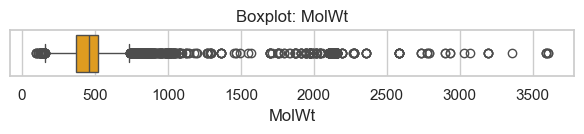

 MolWt:
 - IQR Outliers: 602
 - Z-score Outliers: 230



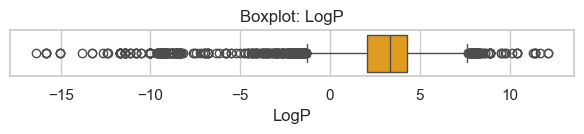

 LogP:
 - IQR Outliers: 449
 - Z-score Outliers: 230



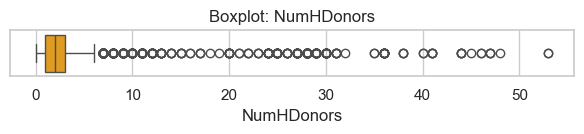

 NumHDonors:
 - IQR Outliers: 496
 - Z-score Outliers: 232



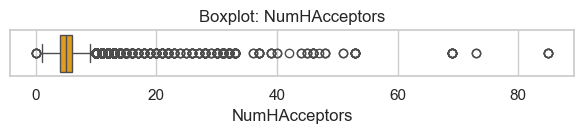

 NumHAcceptors:
 - IQR Outliers: 1176
 - Z-score Outliers: 270



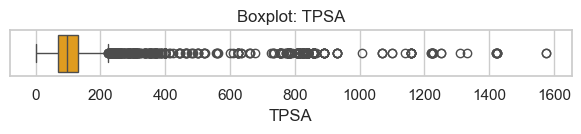

 TPSA:
 - IQR Outliers: 549
 - Z-score Outliers: 239



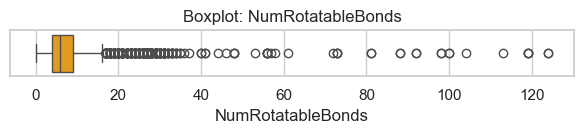

 NumRotatableBonds:
 - IQR Outliers: 518
 - Z-score Outliers: 318



In [59]:
# Select only descriptor columns for analysis
descriptor_cols = ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'NumRotatableBonds']

# --- Helper functions ---
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(zscore(df[column].dropna()))
    return df.loc[df[column].dropna().index[z_scores > threshold]]

# --- Visualize with boxplots and show outlier count ---
for col in descriptor_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df_with_descriptors[col], color='orange')
    plt.title(f"Boxplot: {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

    iqr_outliers = detect_outliers_iqr(df_with_descriptors, col)
    zscore_outliers = detect_outliers_zscore(df_with_descriptors, col)

    print(f" {col}:")
    print(f" - IQR Outliers: {len(iqr_outliers)}")
    print(f" - Z-score Outliers: {len(zscore_outliers)}\n")

In [60]:
df_cleaned = df_with_descriptors.copy()
for col in descriptor_cols:
    iqr_outliers = detect_outliers_iqr(df_cleaned, col)
    df_cleaned = df_cleaned[~df_cleaned.index.isin(iqr_outliers.index)]

print("Cleaned dataframe shape:", df_cleaned.shape)

Cleaned dataframe shape: (15712, 11)


In [61]:
df_cleaned.isnull().sum()

Ligand SMILES                      113
BindingDB Ligand Name              113
Target Name                        113
BindingDB Target Chain Sequence    113
MolWt                              251
LogP                               251
NumHDonors                         251
NumHAcceptors                      251
TPSA                               251
NumRotatableBonds                  251
Lipinski_Pass                      251
dtype: int64

In [62]:
df_cleaned.dropna(inplace=True)

In [63]:
df_cleaned.shape

(15348, 11)

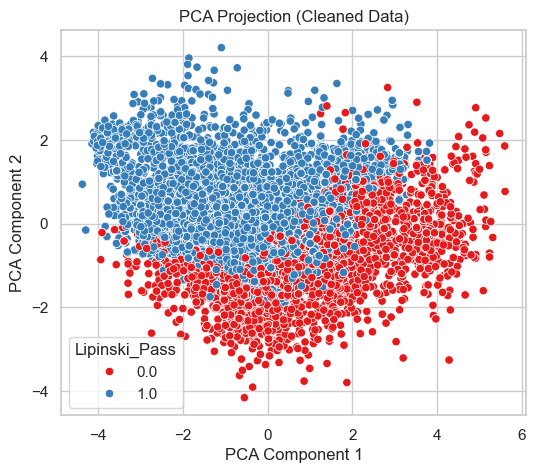

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[descriptor_cols])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cleaned['Lipinski_Pass'], palette='Set1')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection (Cleaned Data)")
plt.grid(True)
plt.show()


Lipinski Rule of 5 - Class Distribution:
Lipinski_Pass
1.0    10196
0.0     5152
Name: count, dtype: int64


/var/folders/pc/65k66fpd65940gkc6sklbn3m0000gn/T/ipykernel_44116/669725673.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lipinski_counts.index, y=lipinski_counts.values, palette='Set2')


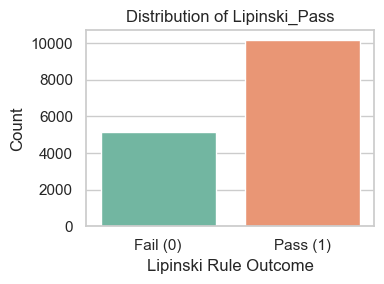

In [65]:
# Count of each class
lipinski_counts = df_cleaned['Lipinski_Pass'].value_counts()

# Display the counts
print("Lipinski Rule of 5 - Class Distribution:")
print(lipinski_counts)

# Plot as bar chart
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(4, 3))
sns.barplot(x=lipinski_counts.index, y=lipinski_counts.values, palette='Set2')
plt.xticks([0, 1], ['Fail (0)', 'Pass (1)'])
plt.title("Distribution of Lipinski_Pass")
plt.xlabel("Lipinski Rule Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


SMOTE to balance the dataset

In [66]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df_cleaned[descriptor_cols]
y = df_cleaned['Lipinski_Pass']

# Scale features before SMOTE (important for synthetic data generation)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [67]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("After SMOTE:")
print(" - X shape:", X_resampled.shape)
print(" - Class distribution:", dict(pd.Series(y_resampled).value_counts()))

After SMOTE:
 - X shape: (20392, 6)
 - Class distribution: {0.0: 10196, 1.0: 10196}


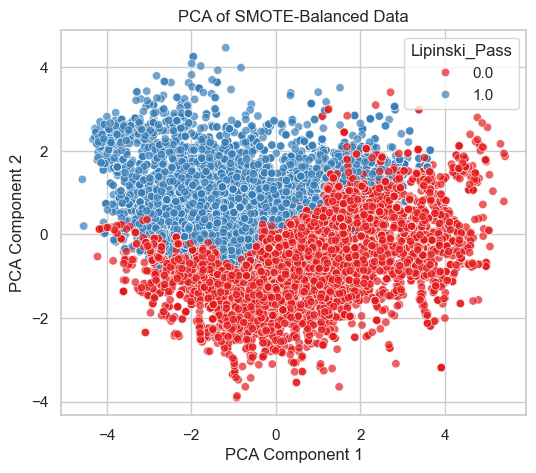

In [68]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_resampled, palette='Set1', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of SMOTE-Balanced Data")
plt.grid(True)
plt.show()

Saving final training data as csv

In [69]:
# Convert resampled arrays back to DataFrame
X_res_df = pd.DataFrame(X_resampled, columns=descriptor_cols)
y_res_df = pd.Series(y_resampled, name="Lipinski_Pass")

# Combine features and target into one DataFrame
balanced_df = pd.concat([X_res_df, y_res_df], axis=1)

# Save to CSV
balanced_df.to_csv("lipinski_balanced_smote.csv", index=False)
print("Saved: 'lipinski_balanced_smote.csv'")

Saved: 'lipinski_balanced_smote.csv'
